# K-means


Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.



###  Algorithm
The following are the main steps of the algorithm:

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without  
   replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

* Compute the sum of the squared distance between data points and all centroids.
* Assign each data point to the closest cluster (centroid).
* Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

### Libraries useful for k-means

In [90]:
#import libraries
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load the "iris" data

In [91]:
#load the dataset
iris = pd.read_csv("iris.data", names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Q1. Perform pre-processing (if required)

In [92]:
# check if null values are there
print("shape of data:")
print (iris.shape)
print("Columns of data:")
print (iris.columns)

iris["species"].value_counts()

shape of data:
(150, 5)
Columns of data:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [93]:
#checking null values
print(sum(iris["sepal_length"].isnull()))
print(sum(iris["sepal_width"].isnull()))
print(sum(iris["petal_length"].isnull()))
print(sum(iris["species"].isnull()))


0
0
0
0


In [94]:
# performing standardization
iris[['sepal_length', 'sepal_width', "petal_length", "petal_width" ]] = preprocessing.StandardScaler().fit_transform(iris[['sepal_length', 'sepal_width', "petal_length", "petal_width" ]])

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [96]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### Q2. Apply K-means on the dataset

The various paramteres used are as follows:

**init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

**n_clusters** sets k for the clustering step. This is the most important parameter for k-means.

**n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

**max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

Use random initialization, number of clusters = 5, number of initializations = 10, maximum iterations = 300, random state = 42  

In [97]:
# apply k-means

df = iris[['sepal_length', 'sepal_width', "petal_length", "petal_width" ]]  # seperating labels
km = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=43)
km.fit_transform(df)
sum_of_squared_distance=[]


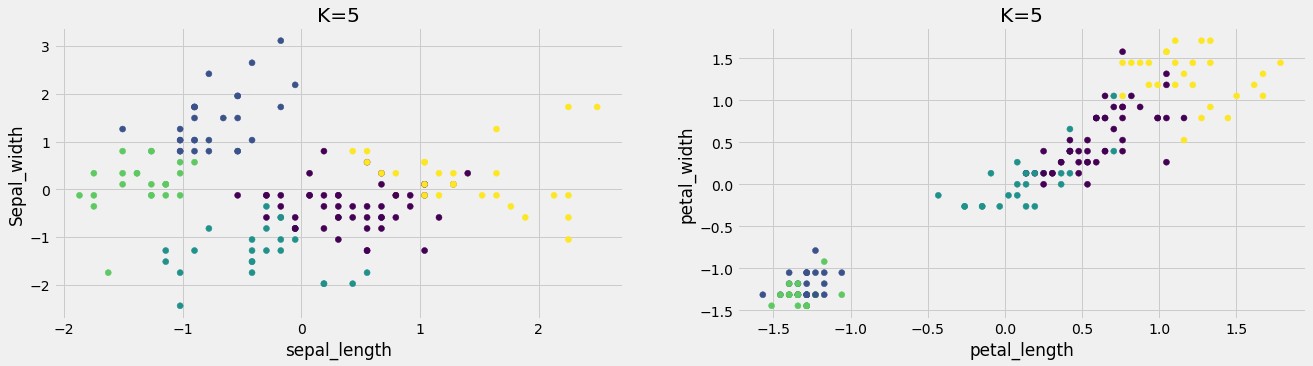

In [98]:
#plot the clusters

y_kmeans = km.predict(df)
import matplotlib.pyplot as plt


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(df["sepal_length"], df["sepal_width"], c=y_kmeans)
plt.title("K=5")
plt.xlabel("sepal_length")
plt.ylabel("Sepal_width")


plt.subplot(1,2,2)
plt.title("k=5")
plt.scatter(df["petal_length"], df["petal_width"], c=y_kmeans)
plt.title("K=5")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

plt.show()

 ### Q3. Find the lowest SSE values and final locations of the centroid

In [99]:
# The lowest SSE value
print("Lowest SSE value: ",km.inertia_)


Lowest SSE value:  91.19197002146461


In [100]:
# Final locations of the centroid
centroids = km.cluster_centers_
print(centroids)

[[ 0.44478706 -0.33707699  0.60993206  0.55503506]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [-0.33846225 -1.30048466  0.13951053  0.05960108]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]
 [ 1.40150837  0.24357305  1.20294131  1.28239709]]


### Q4. Use initialization technique as "k-means++" and calculate the above values again

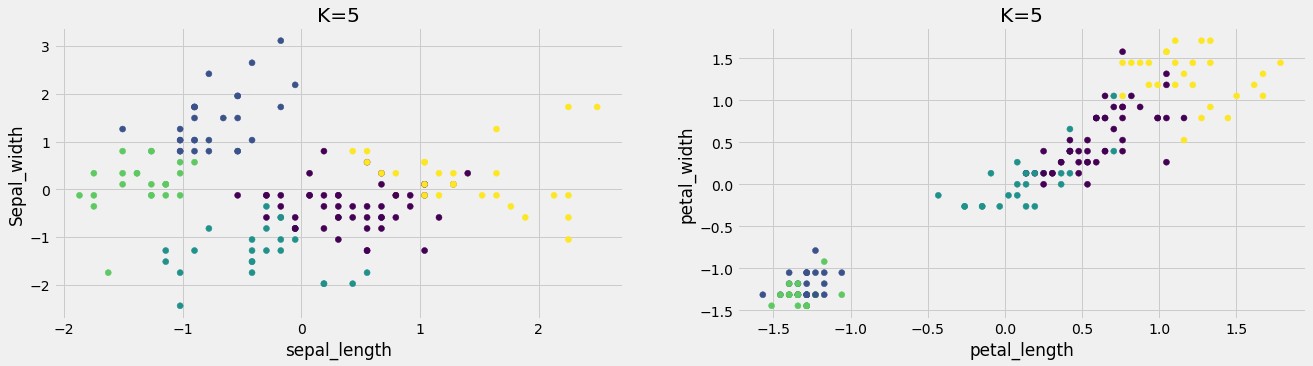

In [101]:
# code here
km = KMeans(init = "k-means++",n_clusters=5, n_init=10, max_iter=300, random_state=43)
km.fit_transform(df)
y_kmeans = km.predict(df)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(df["sepal_length"], df["sepal_width"], c=y_kmeans)
plt.title("K=5")
plt.xlabel("sepal_length")
plt.ylabel("Sepal_width")


plt.subplot(1,2,2)
plt.title("k=5")
plt.scatter(df["petal_length"], df["petal_width"], c=y_kmeans)
plt.title("K=5")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [102]:
# The lowest SSE value
print("Lowest SSE value: ",km.inertia_)


Lowest SSE value:  91.19197002146461


In [103]:
# Final locations of the centroid
centroids = km.cluster_centers_
print(centroids)

[[ 0.44478706 -0.33707699  0.60993206  0.55503506]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [-0.33846225 -1.30048466  0.13951053  0.05960108]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]
 [ 1.40150837  0.24357305  1.20294131  1.28239709]]


### Q5. Draw a graph between k and SSE

The **elbow method** is commonly used to evaluate the appropriate number of clusters. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

Vary the value of k from 1 to 10, using same parameters for KMeans as above.

In [104]:
sum_of_squared_distance=[]
K = range(1,11)
for k in K:
    km = KMeans(init = "k-means++",n_clusters=k, n_init=10, max_iter=300, random_state=43)
    km = km.fit(df)
    sum_of_squared_distance.append(km.inertia_)

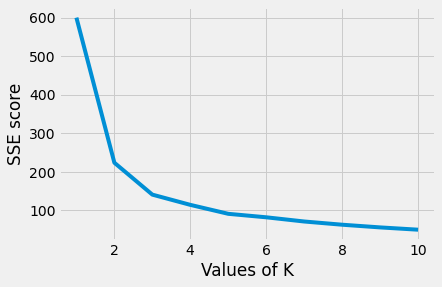

In [105]:
# Plot the graph
# Note: use style as "fivethirtyeight" to plot the graph and view sse values appropriately
plt.style.use('fivethirtyeight')
plt.plot(K,sum_of_squared_distance)
plt.xlabel("Values of K")
plt.ylabel("SSE score")
plt.show()

### Q6. What is the elbow point in the SSE curve?



# k = 3 is the correct value for our data.

In [ ]:
# because after 3 the curve becomes smooth and does not reduce much further